In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [2]:
#import dataset
bank_data = pd.read_csv('https://raw.githubusercontent.com/karanzijm/MLExploratoryDataAnalaysis/main/bank-full.csv',sep=';')
bank_data

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

In [3]:
bank_data.info()
import matplotlib.pyplot as plt
import seaborn as sns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
bank_data.shape #check for row and column numbers

(45211, 17)

In [5]:
#check some more
bank_data.describe(include='all')

age          job  marital  education default        balance  \
count   45211.000000        45211    45211      45211   45211   45211.000000   
unique           NaN           12        3          4       2            NaN   
top              NaN  blue-collar  married  secondary      no            NaN   
freq             NaN         9732    27214      23202   44396            NaN   
mean       40.936210          NaN      NaN        NaN     NaN    1362.272058   
std        10.618762          NaN      NaN        NaN     NaN    3044.765829   
min        18.000000          NaN      NaN        NaN     NaN   -8019.000000   
25%        33.000000          NaN      NaN        NaN     NaN      72.000000   
50%        39.000000          NaN      NaN        NaN     NaN     448.000000   
75%        48.000000          NaN      NaN        NaN     NaN    1428.000000   
max        95.000000          NaN      NaN        NaN     NaN  102127.000000   

       housing   loan   contact           day  month      duration  \
count    45211  45211     45211  45211.000000  45211  45211.000000   
unique       2      2         3           NaN     12           NaN   
top        yes     no  cellular           NaN    may           NaN   
freq     25130  37967     29285           NaN  13766           NaN   
mean       NaN    NaN       NaN     15.806419    NaN    258.163080   
std        NaN    NaN       NaN      8.322476    NaN    257.527812   
min        NaN    NaN       NaN      1.000000    NaN      0.000000   
25%        NaN    NaN       NaN      8.000000    NaN    103.000000   
50%        NaN    NaN       NaN     16.000000    NaN    180.000000   
75%        NaN    NaN       NaN     21.000000    NaN    319.000000   
max        NaN    NaN       NaN     31.000000    NaN   4918.000000   

            campaign         pdays      previous poutcome      y  
count   45211.000000  45211.000000  45211.000000    45211  45211  
unique           NaN           NaN           NaN        4      2  
top              NaN           NaN           NaN  unknown     no  
freq             NaN           NaN           NaN    36959  39922  
mean        2.763841     40.197828      0.580323      NaN    NaN  
std         3.098021    100.128746      2.303441      NaN    NaN  
min         1.000000     -1.000000      0.000000      NaN    NaN  
25%         1.000000     -1.000000      0.000000      NaN    NaN  
50%         2.000000     -1.000000      0.000000      NaN    NaN  
75%         3.000000     -1.000000      0.000000      NaN    NaN  
max        63.000000    871.000000    275.000000      NaN    NaN

In [6]:
# Check for duplicates
print("Duplicates:", bank_data.duplicated().sum())

Duplicates: 0


In [7]:
# Check for missing values in each column
print(bank_data.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [8]:
# Get counts for each category in the categorical columns
for i in bank_data.select_dtypes(include ="object").columns:
    print(bank_data[i].value_counts())
    print("***"*10)

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64
******************************
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
******************************
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64
******************************
default
no     44396
yes      815
Name: count, dtype: int64
******************************
housing
yes    25130
no     20081
Name: count, dtype: int64
******************************
loan
no     37967
yes     7244
Name: count, dtype: int64
******************************
contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64
******************************
month
may    13766
ju

In [9]:
bank_data.describe().T

count         mean          std     min    25%    50%     75%  \
age       45211.0    40.936210    10.618762    18.0   33.0   39.0    48.0   
balance   45211.0  1362.272058  3044.765829 -8019.0   72.0  448.0  1428.0   
day       45211.0    15.806419     8.322476     1.0    8.0   16.0    21.0   
duration  45211.0   258.163080   257.527812     0.0  103.0  180.0   319.0   
campaign  45211.0     2.763841     3.098021     1.0    1.0    2.0     3.0   
pdays     45211.0    40.197828   100.128746    -1.0   -1.0   -1.0    -1.0   
previous  45211.0     0.580323     2.303441     0.0    0.0    0.0     0.0   

               max  
age           95.0  
balance   102127.0  
day           31.0  
duration    4918.0  
campaign      63.0  
pdays        871.0  
previous     275.0

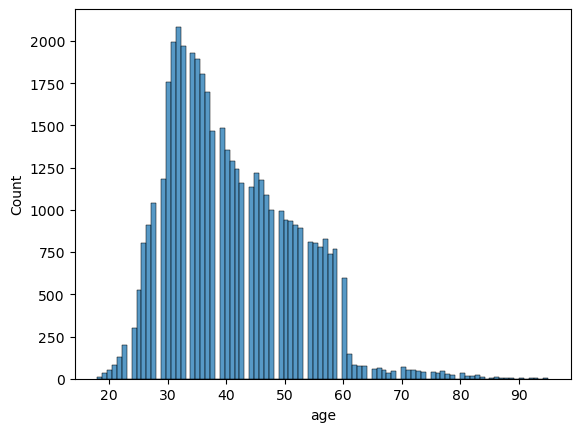

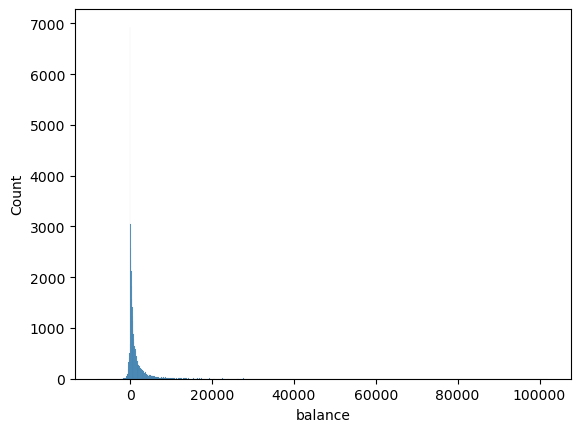

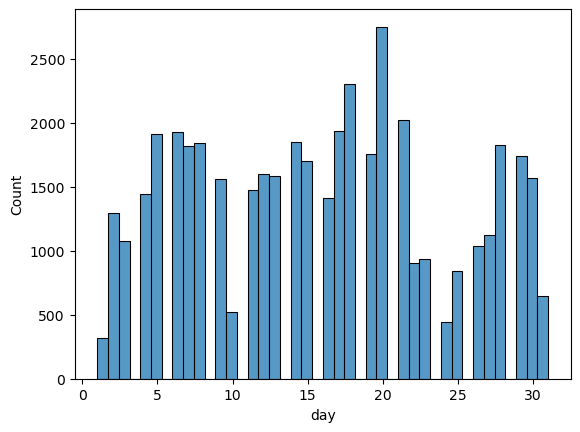

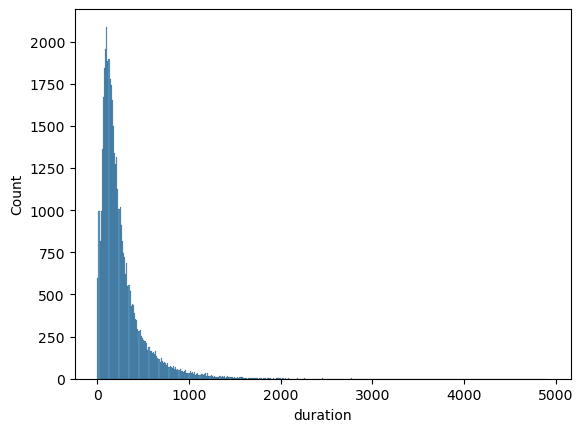

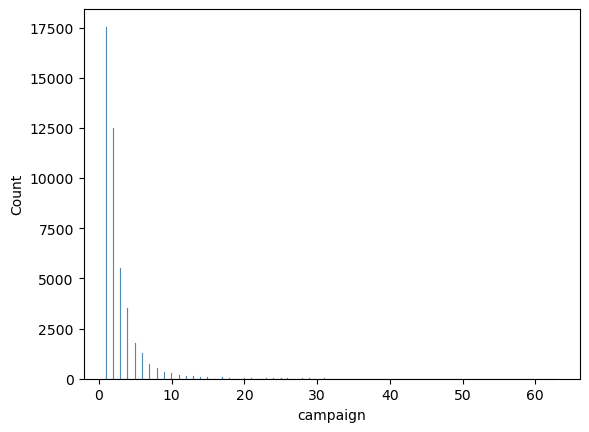

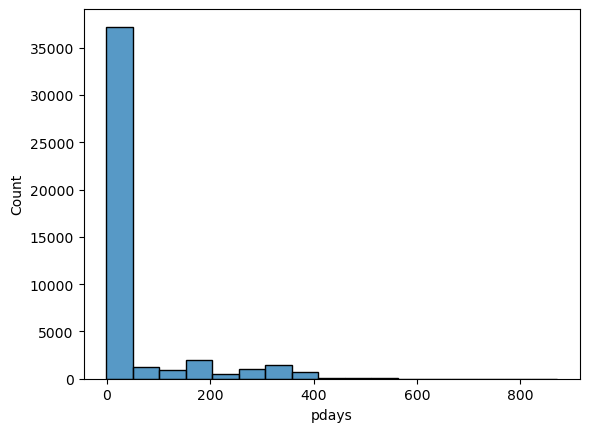

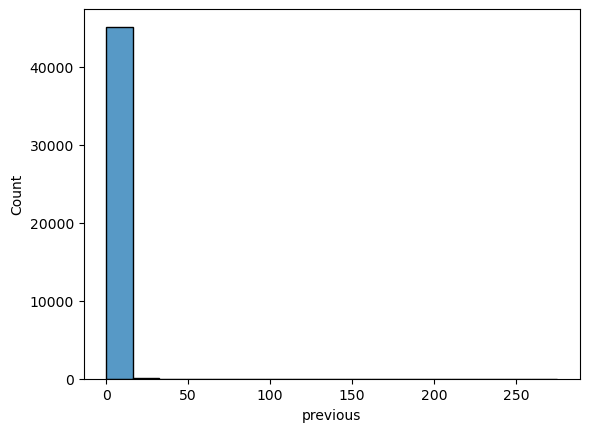

In [10]:
#understand the distribution using the histogram
for i in bank_data.select_dtypes(include="number").columns:
    sns.histplot(data=bank_data, x=i)
    plt.show()

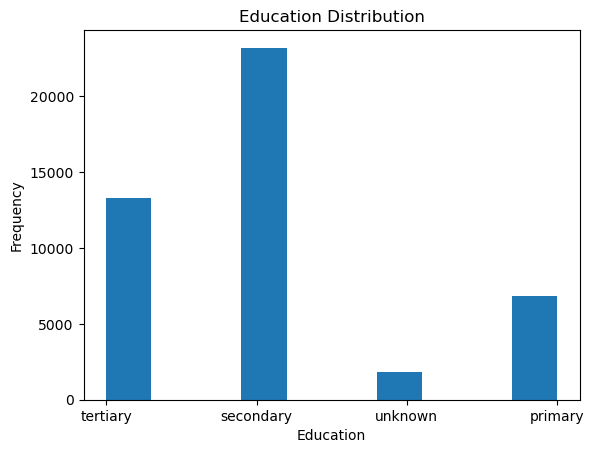

y             no   yes
education             
primary     6260   591
secondary  20752  2450
tertiary   11305  1996
unknown     1605   252


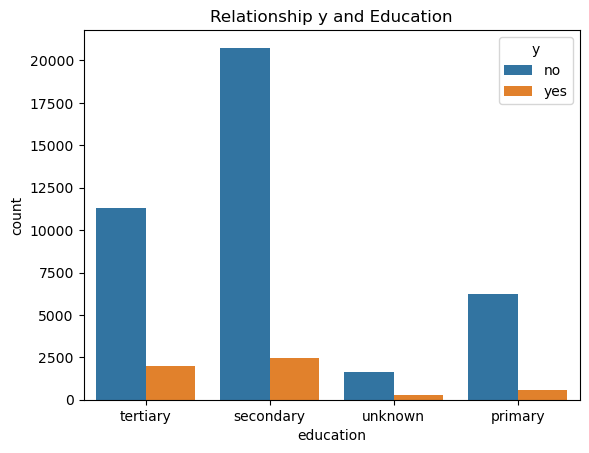

In [11]:
plt.hist(bank_data['education'], bins=10)
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.title('Education Distribution')
plt.show()

ct_t = pd.crosstab(bank_data['education'], bank_data['y'])
print(ct_t)

# Graph To Analyzing the effect of Gender on Recurred
sns.countplot(data=bank_data, x='education', hue='y')
plt.title('Relationship y and Education')
plt.show()

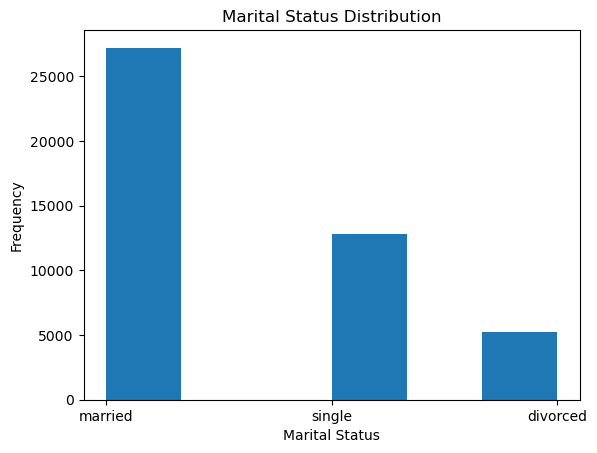

y            no   yes
marital              
divorced   4585   622
married   24459  2755
single    10878  1912


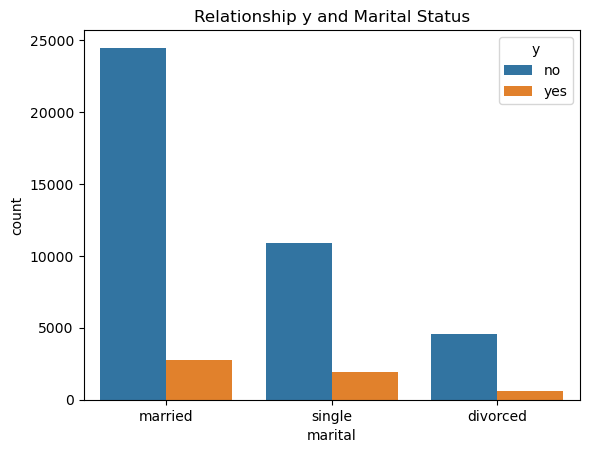

In [12]:
plt.hist(bank_data['marital'], bins=6)
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.title('Marital Status Distribution')
plt.show()

ct_t_marital = pd.crosstab(bank_data['marital'], bank_data['y'])
print(ct_t_marital)

# Graph To Analyzing the effect of Gender on Recurred
sns.countplot(data=bank_data, x='marital', hue='y')
plt.title('Relationship y and Marital Status')
plt.show()

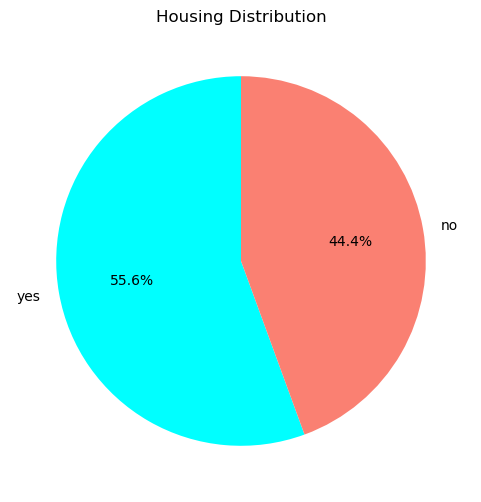

y           no   yes
housing             
no       16727  3354
yes      23195  1935


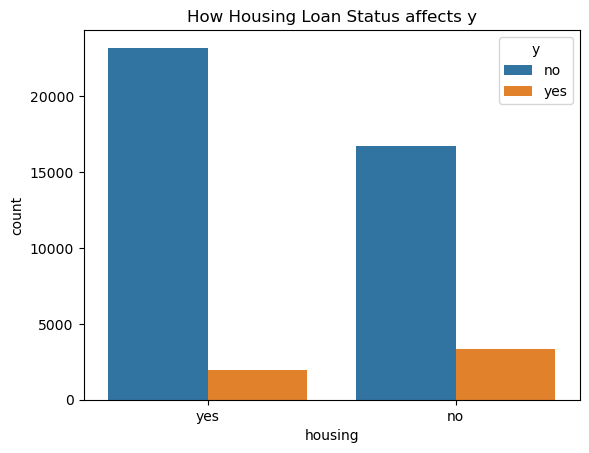

In [13]:
# Get counts of each unique value in the 'housing' column
loan_counts = bank_data['housing'].value_counts()

# Plot housing loan pie chart
plt.figure(figsize=(6, 6))
plt.pie(loan_counts, labels=loan_counts.index, autopct='%1.1f%%', startangle=90, colors=['cyan', 'salmon'])
plt.title('Housing Distribution')
plt.show()

ct_t_housing = pd.crosstab(bank_data['housing'], bank_data['y'])
print(ct_t_housing)

# Graph To Analyzing the effect of Gender on Recurred
sns.countplot(data=bank_data, x='housing', hue='y')
plt.title('How Housing Loan Status affects y')
plt.show()

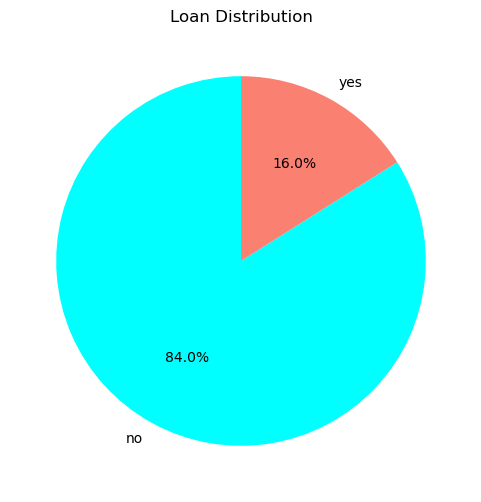

y        no   yes
loan             
no    33162  4805
yes    6760   484


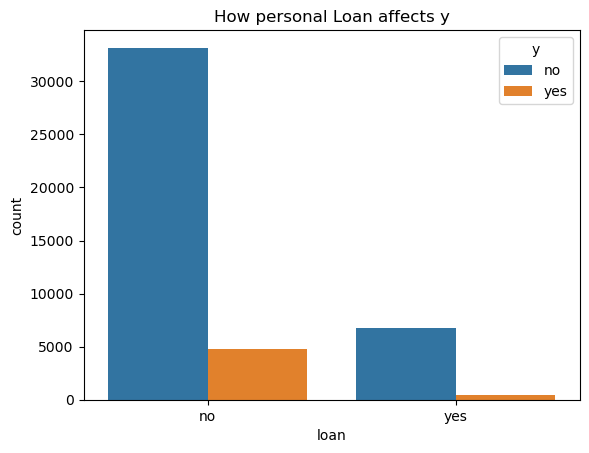

In [14]:
# Get counts of those with a loan and those without
loan_counts = bank_data['loan'].value_counts()

# Plot personal loan pie chart
plt.figure(figsize=(6, 6))
plt.pie(loan_counts, labels=loan_counts.index, autopct='%1.1f%%', startangle=90, colors=['cyan', 'salmon'])
plt.title('Loan Distribution')
plt.show()

ct_t_loan = pd.crosstab(bank_data['loan'], bank_data['y'])
print(ct_t_loan)

# Graph To Analyzing the effect of Gender on Recurred
sns.countplot(data=bank_data, x='loan', hue='y')
plt.title('How personal Loan affects y')
plt.show()

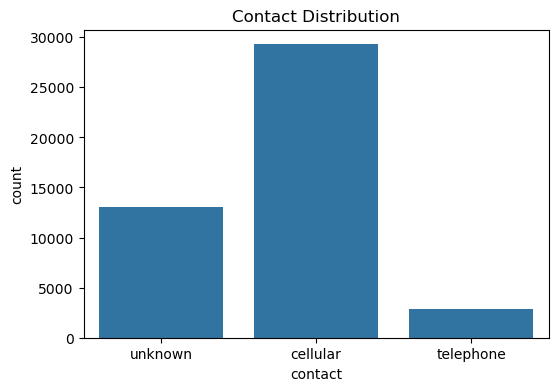

y        no   yes
loan             
no    33162  4805
yes    6760   484


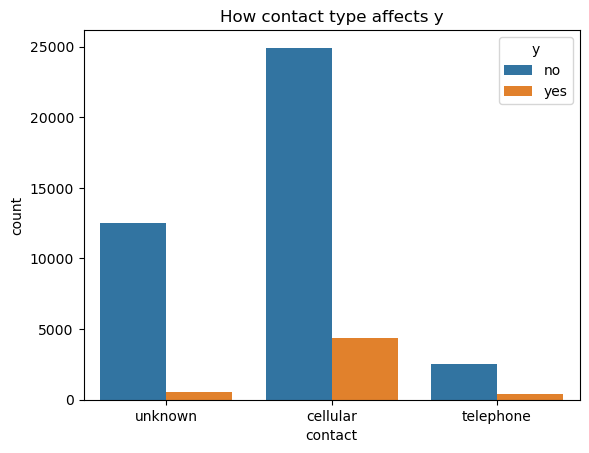

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(x='contact', data=bank_data)
plt.title('Contact Distribution')
plt.show()

ct_t_contact = pd.crosstab(bank_data['contact'], bank_data['y'])
print(ct_t_loan)

# Graph To Analyzing the effect of Gender on Recurred
sns.countplot(data=bank_data, x='contact', hue='y')
plt.title('How contact type affects y')
plt.show()

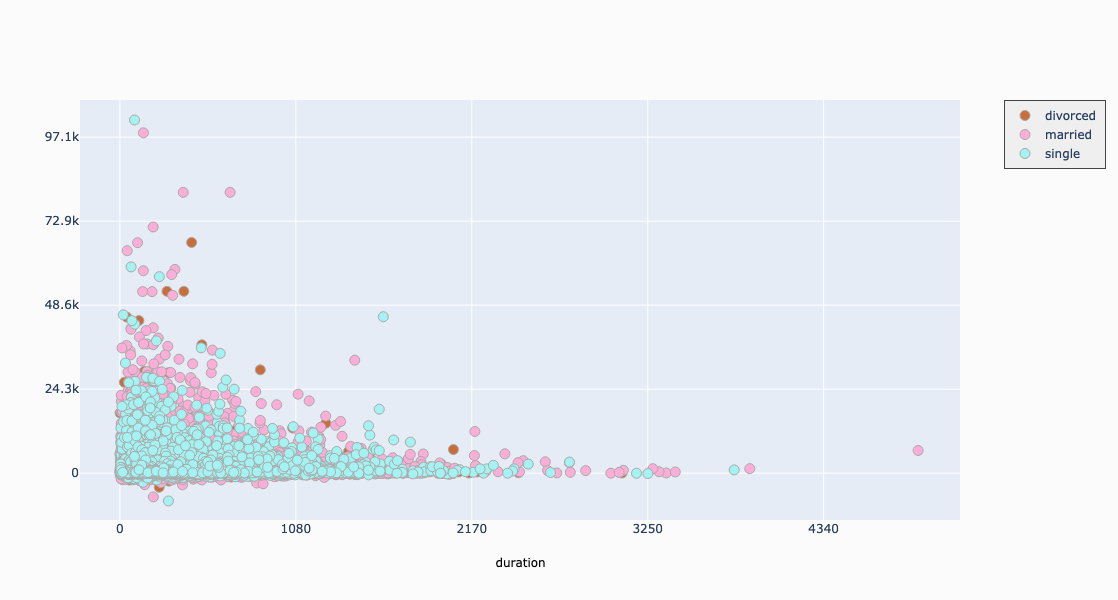

In [16]:


# Notice how divorced have a considerably low amount of balance.
fig = ff.create_facet_grid(
    bank_data,
    x='duration',
    y='balance',
    color_name='marital',
    show_boxes=False,
    marker={'size': 10, 'opacity': 1.0},
    colormap={'single': 'rgb(165, 242, 242)', 'married': 'rgb(253, 174, 216)', 'divorced': 'rgba(201, 109, 59, 0.82)'}
)

iplot(fig, filename='facet - custom colormap')



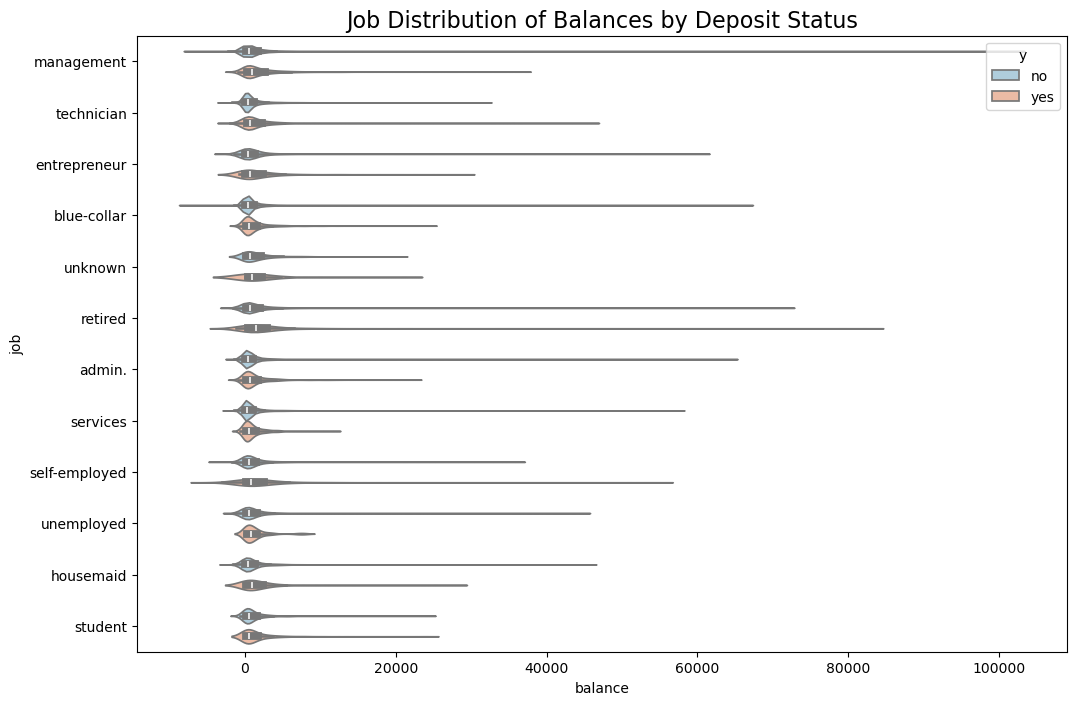

In [17]:
fig = plt.figure(figsize=(12,8))

sns.violinplot(x="balance", y="job", hue="y", palette="RdBu_r",
            data=bank_data);

plt.title("Job Distribution of Balances by Deposit Status", fontsize=16)

plt.show()

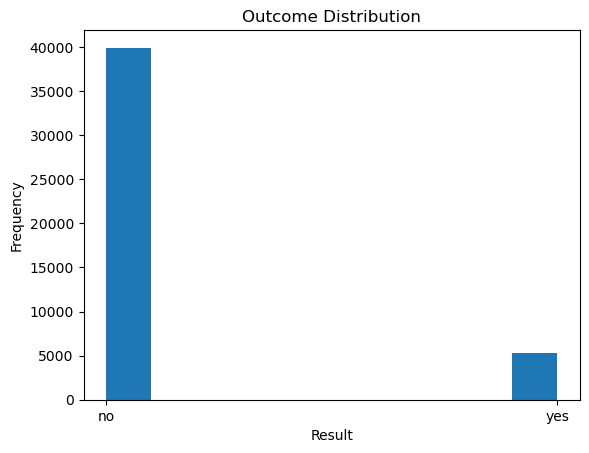

In [18]:
plt.hist(bank_data['y'], bins=10)
plt.xlabel('Result')
plt.ylabel('Frequency')
plt.title('Outcome Distribution')
plt.show()

In [19]:
numerical_data_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays','previous']
numerical_data = bank_data[numerical_data_columns]

normalised_data = (numerical_data - numerical_data.mean())/numerical_data.std()
normalised_data.head()

age   balance       day  duration  campaign     pdays  previous
0  1.606947  0.256416 -1.298462  0.011016 -0.569344 -0.411449 -0.251938
1  0.288526 -0.437890 -1.298462 -0.416122 -0.569344 -0.411449 -0.251938
2 -0.747376 -0.446758 -1.298462 -0.707353 -0.569344 -0.411449 -0.251938
3  0.571045  0.047205 -1.298462 -0.645224 -0.569344 -0.411449 -0.251938
4 -0.747376 -0.447086 -1.298462 -0.233618 -0.569344 -0.411449 -0.251938

In [20]:
"""Below i use cramer's V statistic to measure association between each individual feature and the outcome y."""

"Below i use cramer's V statistic to measure association between each individual feature and the outcome y."

In [21]:
# Calculate p-values for each feature
features = ['age', 'housing', 'loan','marital',  'job', 'education', 'contact']

for feature in features:
    contingency_table = pd.crosstab(bank_data[feature], bank_data['y'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"{feature} vs. y: Chi-Square={chi2}, p-value={p_value}")

age vs. y: Chi-Square=1635.2642958823858, p-value=3.5715995209654754e-291
housing vs. y: Chi-Square=874.822448867983, p-value=2.918797605076633e-192
loan vs. y: Chi-Square=209.61698034978633, p-value=1.6650611634927562e-47
marital vs. y: Chi-Square=196.49594565603957, p-value=2.1450999986791792e-43
job vs. y: Chi-Square=836.1054877471965, p-value=3.337121944935502e-172
education vs. y: Chi-Square=238.92350616407606, p-value=1.6266562124072994e-51
contact vs. y: Chi-Square=1035.714225356292, p-value=1.2517383253406373e-225


In [22]:
"""All features have extremely low p-values, which indicate statistically significant associations with y.
Based on the Chi-Square values, age, housing, job, and contact seem to show relatively stronger associations with the target variable, 
while loan, marital, and education have weaker associations."""

'All features have extremely low p-values, which indicate statistically significant associations with y.\nBased on the Chi-Square values, age, housing, job, and contact seem to show relatively stronger associations with the target variable, \nwhile loan, marital, and education have weaker associations.'

In [23]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k, r) - 1)))

print(cramers_v(bank_data['age'], bank_data['y']))
print(cramers_v(bank_data['housing'], bank_data['y']))
print(cramers_v(bank_data['loan'], bank_data['y']))
print(cramers_v(bank_data['day'], bank_data['y']))
print(cramers_v(bank_data['duration'], bank_data['y']))
print(cramers_v(bank_data['campaign'], bank_data['y']))
print(cramers_v(bank_data['marital'], bank_data['y']))
print(cramers_v(bank_data['pdays'], bank_data['y']))
print(cramers_v(bank_data['previous'], bank_data['y']))
print(cramers_v(bank_data['job'], bank_data['y']))
print(cramers_v(bank_data['education'], bank_data['y']))
print(cramers_v(bank_data['contact'], bank_data['y']))

0.19018309937185943
0.1391034505051807
0.06809122911100252
0.11268161101965538
0.4834807642897198
0.08917083802206957
0.06592569856952814
0.31645458954316463
0.17450688445279833
0.13599047177178863
0.07269547575269042
0.15135539788059024


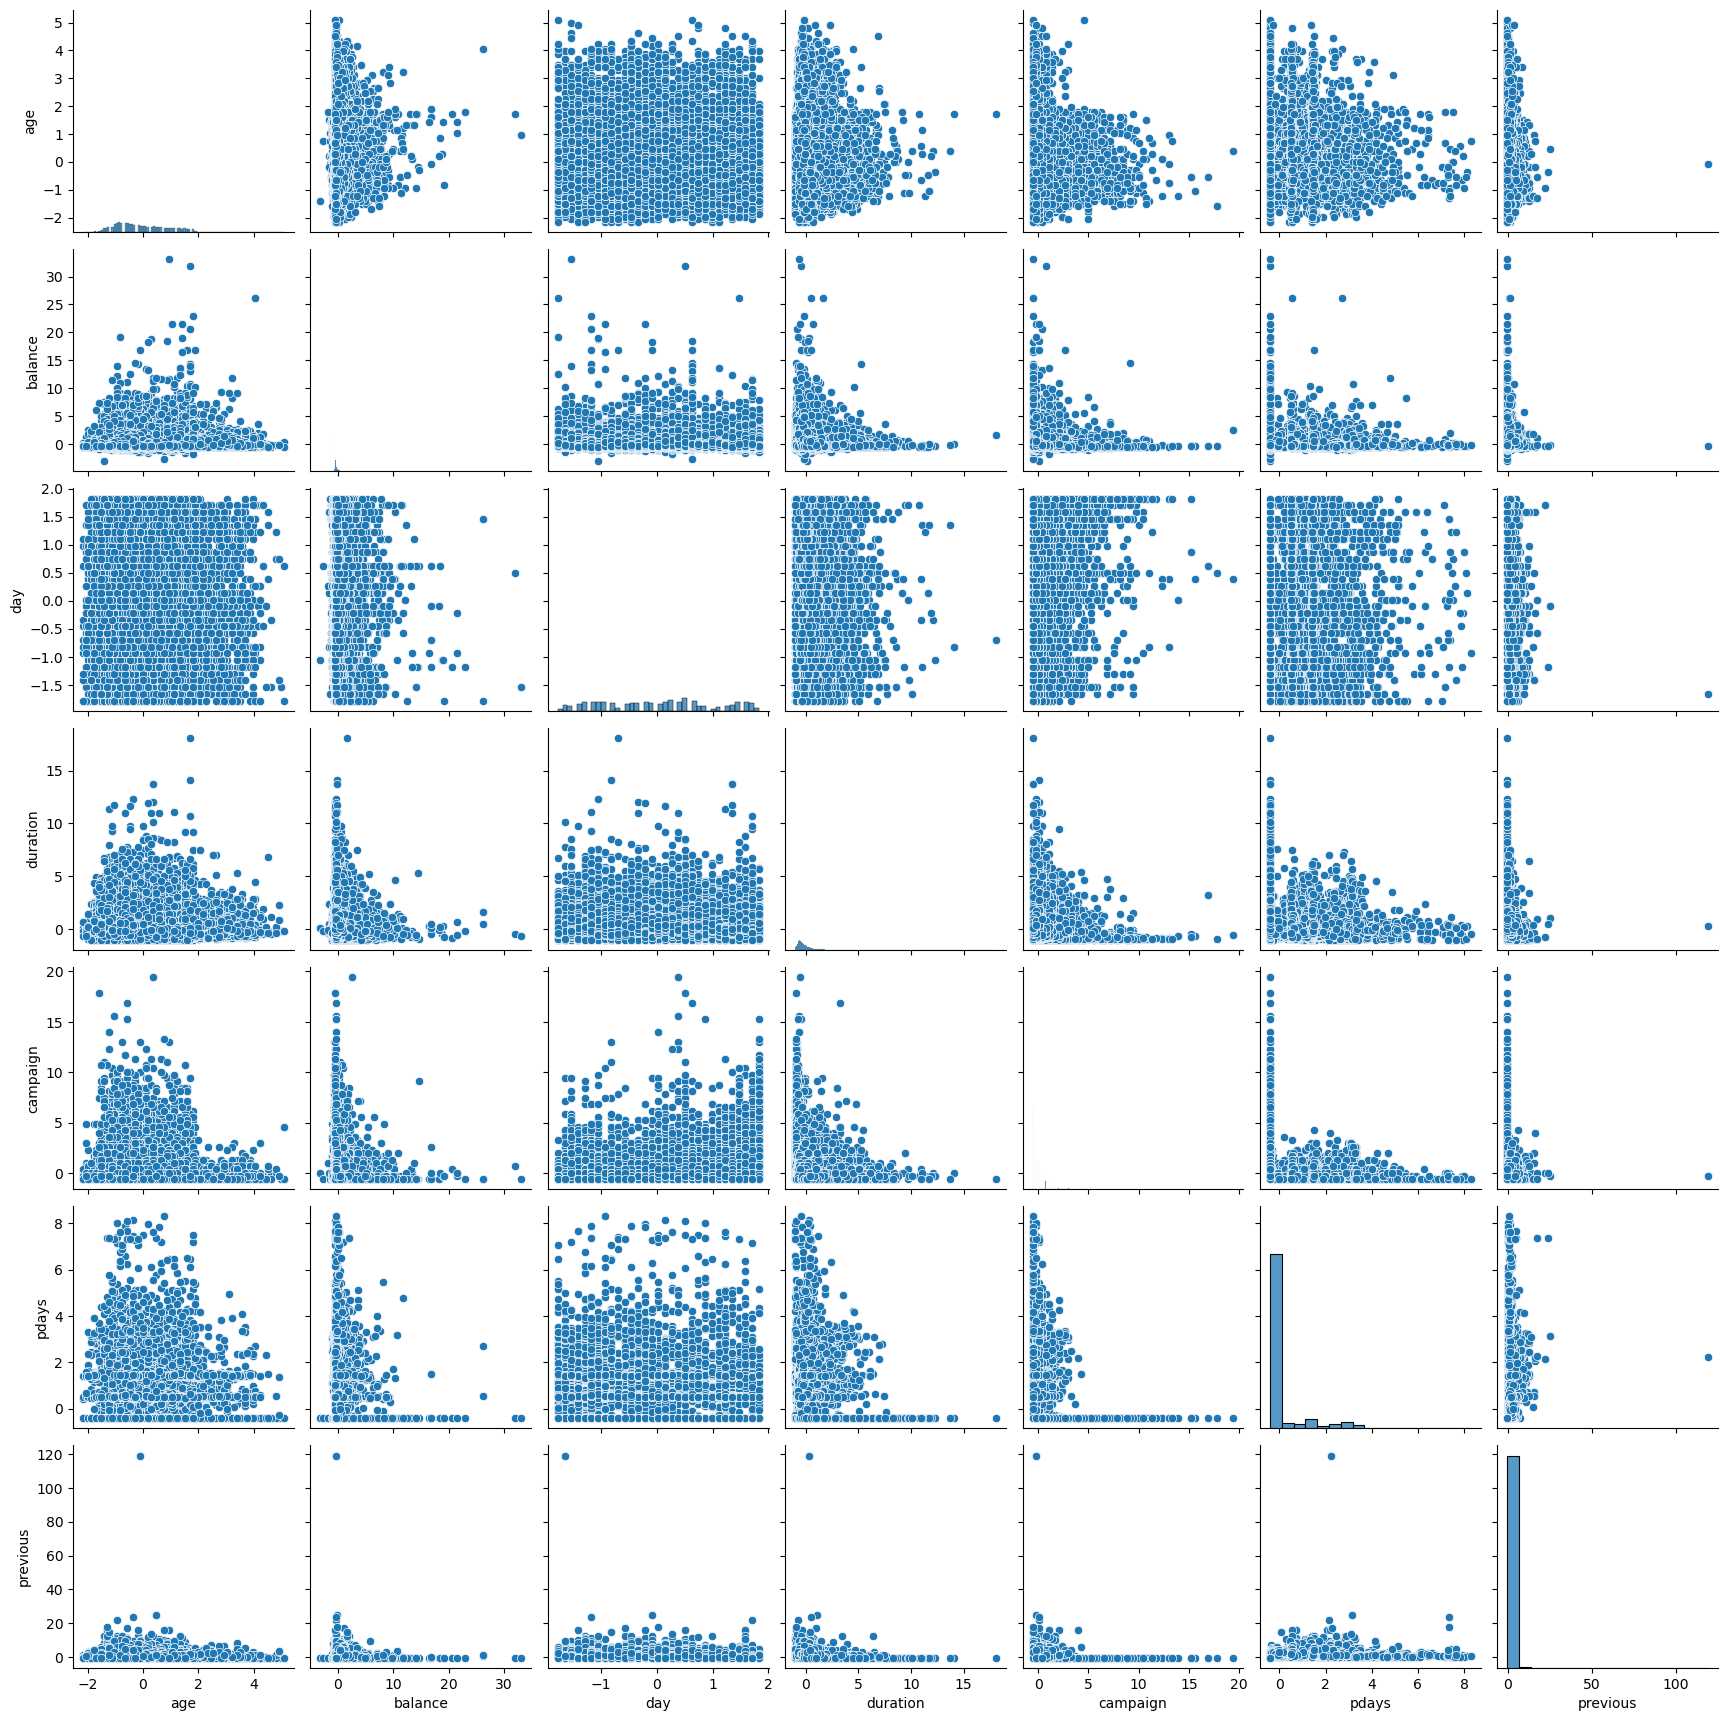

In [24]:
sns.pairplot(normalised_data)

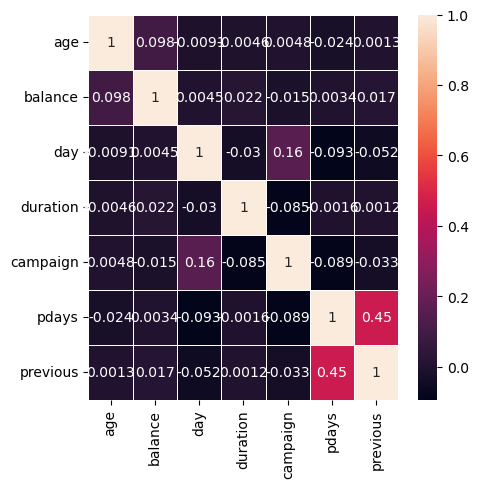

In [25]:
f, x = plt.subplots(figsize=(5, 5))
sns.heatmap(normalised_data.corr(), annot=True, linewidth=.5, ax=x);

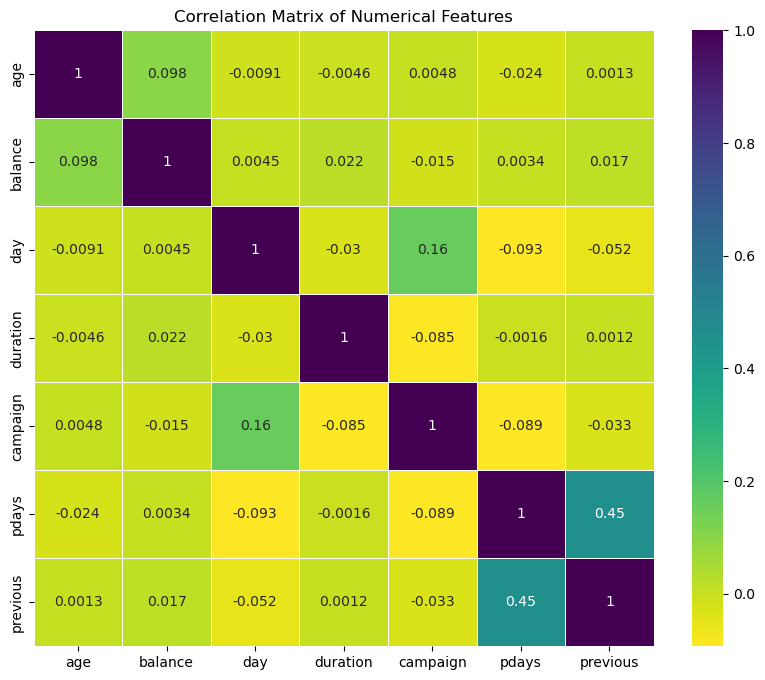

In [26]:
# Calculate the correlation matrix
correlation_matrix = normalised_data.corr()

# Create the heatmap with a reversed colormap (darker colors for higher correlation)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis_r', linewidths=.5) #viridis_r reverses the colormap
plt.title('Correlation Matrix of Numerical Features')
plt.show()

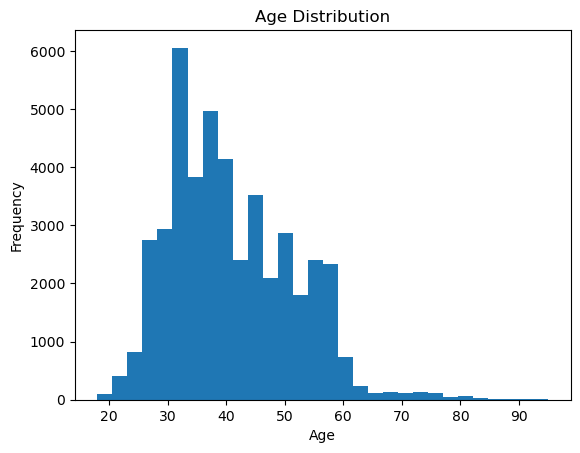

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64


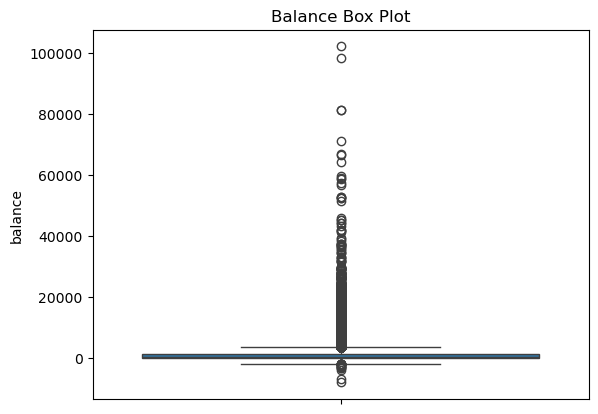

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram without scaling
plt.hist(bank_data['age'], bins=30)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()
print(bank_data['age'].describe())


# Box plot for 'balance'
sns.boxplot(bank_data['balance'])
plt.title('Balance Box Plot')
plt.show()
print(bank_data['balance'].describe())


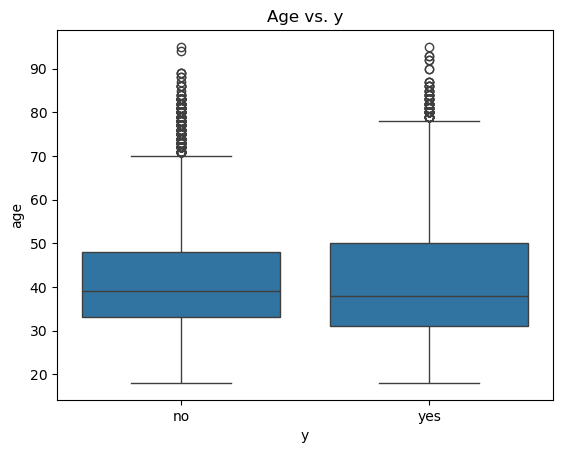

In [28]:
sns.boxplot(x='y', y='age', data=bank_data)
plt.title('Age vs. y')
plt.show()

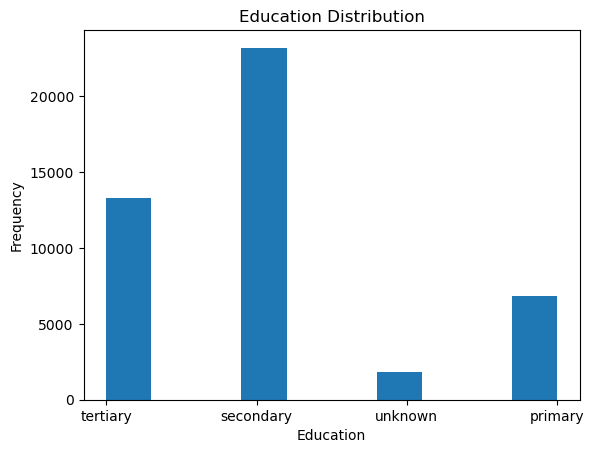

In [29]:
plt.hist(bank_data['education'], bins=10)
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.title('Education Distribution')
plt.show()

In [30]:
bank_data['education'].value_counts().index
bank_data['education'] = pd.Categorical(bank_data['education'], ordered= True, categories=['tertiary', 'secondary', 'primary', 'unknown'])
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  object  
 2   marital    45211 non-null  object  
 3   education  45211 non-null  category
 4   default    45211 non-null  object  
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  object  
 7   loan       45211 non-null  object  
 8   contact    45211 non-null  object  
 9   day        45211 non-null  int64   
 10  month      45211 non-null  object  
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  object  
 16  y          45211 non-null  object  
dtypes: category(1), int64(7), object(9)
memory usage: 5.6+ MB


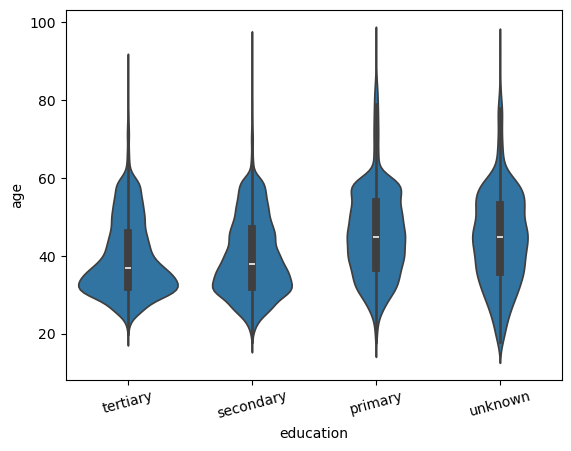

In [31]:
sns.violinplot(data=bank_data, x='education', y='age')
plt.xticks(rotation=15);

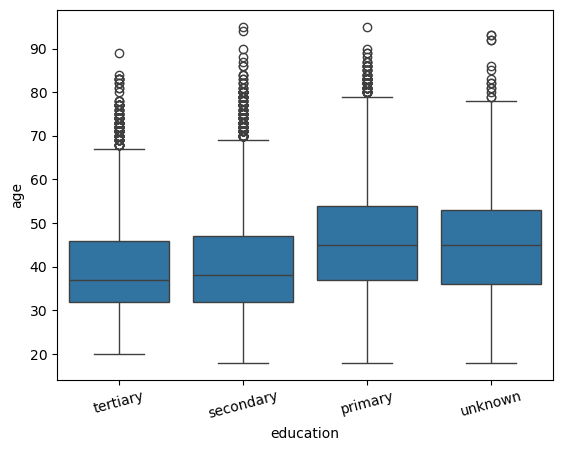

In [32]:
sns.boxplot(data=bank_data, x='education', y='age')
plt.xticks(rotation=15);

In [33]:
#'age', 'housing', 'loan','marital',  'job', 'education', 'contact'
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

ord_encoder = OrdinalEncoder()
encoder = OneHotEncoder()
label_encoder = LabelEncoder()
encoded_bank_data = bank_data.copy()

#y
y = np.expand_dims(bank_data["y"].values, axis=1)
y_encoded = ord_encoder.fit_transform(y)
bank_data["y"] = y_encoded
encoded_bank_data["y"] = y_encoded


#
housing = np.expand_dims(encoded_bank_data["housing"].values, axis=1)
housing_encoded = ord_encoder.fit_transform(housing)
encoded_bank_data["housing"] = housing_encoded

#loan
loan = np.expand_dims(encoded_bank_data["loan"].values, axis=1)
loan_encoded = ord_encoder.fit_transform(loan)
encoded_bank_data["loan"] = loan_encoded

#default
loan = np.expand_dims(encoded_bank_data["default"].values, axis=1)
loan_encoded = ord_encoder.fit_transform(loan)
encoded_bank_data["default"] = loan_encoded

#encode categorical fields with more than 2 categories


#marital
encoded_bank_data['marital'] = label_encoder.fit_transform(bank_data['marital'])

# education
encoded_bank_data['education'] = label_encoder.fit_transform(bank_data['education'])


# contact feature
encoded_bank_data['contact'] = label_encoder.fit_transform(bank_data['contact'])


# poutcome
encoded_bank_data['poutcome'] = label_encoder.fit_transform(bank_data['poutcome'])


# job
encoded_bank_data['job'] = label_encoder.fit_transform(bank_data['job'])

encoded_bank_data['month'] = label_encoder.fit_transform(bank_data['month'])


# Drop the original categorical columns
# encoded_bank_data = encoded_bank_data.drop(["education", "contact", "poutcome","job","month"], axis=1)

encoded_bank_data

age  job  marital  education  default  balance  housing  loan  contact  \
0       58    4        1          2      0.0     2143      1.0   0.0        2   
1       44    9        2          1      0.0       29      1.0   0.0        2   
2       33    2        1          1      0.0        2      1.0   1.0        2   
3       47    1        1          3      0.0     1506      1.0   0.0        2   
4       33   11        2          3      0.0        1      0.0   0.0        2   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
45206   51    9        1          2      0.0      825      0.0   0.0        0   
45207   71    5        0          0      0.0     1729      0.0   0.0        0   
45208   72    5        1          1      0.0     5715      0.0   0.0        0   
45209   57    1        1          1      0.0      668      0.0   0.0        1   
45210   37    2        1          1      0.0     2971      0.0   0.0        0   

       day  month  duration  campaign  pdays  previous  poutcome    y  
0        5      8       261         1     -1         0         3  0.0  
1        5      8       151         1     -1         0         3  0.0  
2        5      8        76         1     -1         0         3  0.0  
3        5      8        92         1     -1         0         3  0.0  
4        5      8       198         1     -1         0         3  0.0  
...    ...    ...       ...       ...    ...       ...       ...  ...  
45206   17      9       977         3     -1         0         3  1.0  
45207   17      9       456         2     -1         0         3  1.0  
45208   17      9      1127         5    184         3         2  1.0  
45209   17      9       508         4     -1         0         3  0.0  
45210   17      9       361         2    188        11         1  0.0  

[45211 rows x 17 columns]

In [34]:
y = bank_data["y"]
x = encoded_bank_data.drop(['y'], axis=1)

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

#split data into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (36168, 16)
X_test shape: (9043, 16)
y_train shape: (36168,)
y_test shape: (9043,)


In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_test, y_pred, title='Confusion Matrix'):
    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Create figure and axes
    plt.figure(figsize=(6, 8))

    # Create heatmap
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        square=True,
        xticklabels=['Negative (0)', 'Positive (1)'],
        yticklabels=['Negative (0)', 'Positive (1)'],
        annot_kws={'size': 16},
        cbar_kws={'shrink': .75}
    )

    # Customize the plot
    plt.title(title, pad=20, size=16)
    plt.xlabel('Predicted Label', labelpad=10)
    plt.ylabel('True Label', labelpad=10)

    # Add text annotations for dynamically calculated metrics
    metrics_text = f'Accuracy: {accuracy:.3f}\nPrecision: {precision:.3f}\nRecall: {recall:.3f}\nF1-Score: {f1:.3f}'
    #plt.text(2.3, 1.0, metrics_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

    # Adjust layout
    plt.tight_layout()

    return plt

Accuracy: 0.8852150834899922
Precision: 0.5674300254452926
Recall: 0.20439963336388633
F1-score: 0.3005390835579515
Misclassification Rate: 0.11478491651000775


<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.12/site-packages/matplotlib/pyplot.py'>

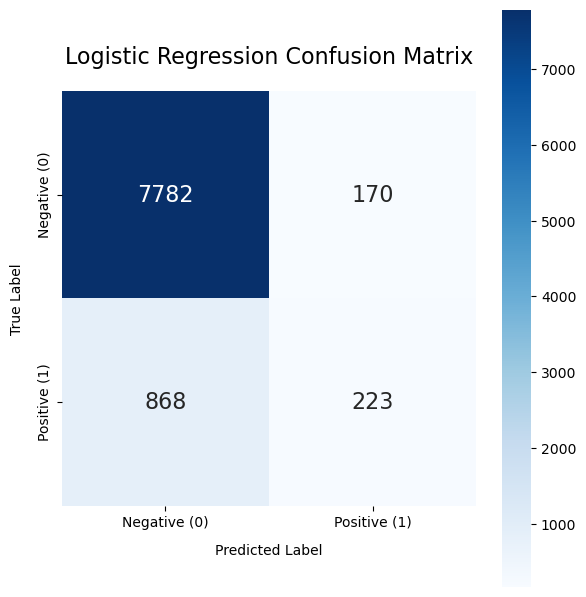

In [37]:
# Train a logistic regression model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=300,solver='liblinear')
model.fit(X_train, y_train)

# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

# Calculate the misclassification rate
misclassification_rate = (y_test != y_pred).mean()
print("Misclassification Rate:", misclassification_rate)

plot_confusion_matrix(y_test, y_pred, title='Logistic Regression Confusion Matrix')

Accuracy: 0.9009178370009953
Precision: 0.6363636363636364
Recall: 0.41704857928505956
F1-score: 0.5038759689922481


<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.12/site-packages/matplotlib/pyplot.py'>

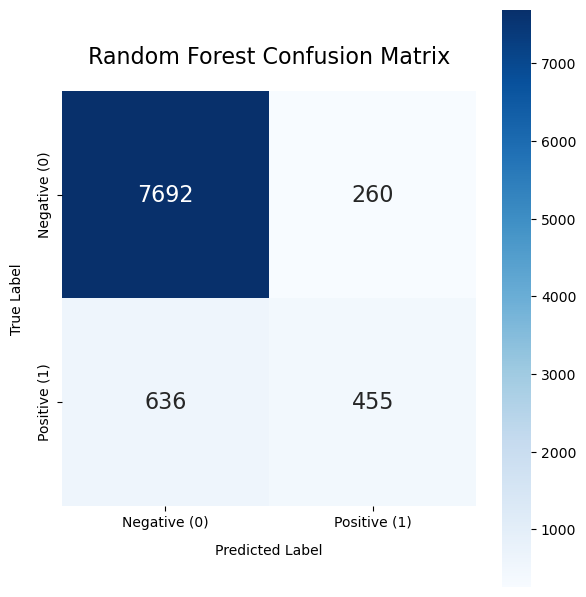

In [38]:
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and testing sets
rand_x_train, rand_x_test, rand_y_train, rand_y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(rand_x_train, rand_y_train)

# Make predictions on the test set
rand_y_pred = rf.predict(rand_x_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(rand_y_test, rand_y_pred))
print("Precision:", precision_score(rand_y_test, rand_y_pred))
print("Recall:", recall_score(rand_y_test, rand_y_pred))
print("F1-score:", f1_score(rand_y_test, rand_y_pred))

plot_confusion_matrix(rand_y_test, rand_y_pred,' Random Forest Confusion Matrix ')

In [39]:
from collections import Counter
from imblearn.under_sampling import (
    RandomUnderSampler,
    NearMiss,
    TomekLinks,
    EditedNearestNeighbours,
    OneSidedSelection,
    NeighbourhoodCleaningRule
)

Resampley = bank_data["y"]
Resamplex = encoded_bank_data.drop(['y'], axis=1)

# Print original class distribution
print('Original dataset shape:', Counter(Resampley))

# 1. Random Undersampling
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(Resamplex, Resampley)
print('Random Undersampling dataset shape:', Counter(y_rus))

# 2. NearMiss-1
nm1 = NearMiss(version=1)
X_nm1, y_nm1 = nm1.fit_resample(Resamplex, Resampley)
print('NearMiss-1 dataset shape:', Counter(y_nm1))

# 3. NearMiss-2
nm2 = NearMiss(version=2)
X_nm2, y_nm2 = nm2.fit_resample(Resamplex, Resampley)
print('NearMiss-2 dataset shape:', Counter(y_nm2))

# 4. NearMiss-3
nm3 = NearMiss(version=3)
X_nm3, y_nm3 = nm3.fit_resample(Resamplex, Resampley)
print('NearMiss-3 dataset shape:', Counter(y_nm3))

# 5. Tomek Links
tl = TomekLinks()
X_tl, y_tl = tl.fit_resample(Resamplex, Resampley)
print('Tomek Links dataset shape:', Counter(y_tl))

# 6. Edited Nearest Neighbours (ENN)
enn = EditedNearestNeighbours()
X_enn, y_enn = enn.fit_resample(Resamplex, Resampley)
print('ENN dataset shape:', Counter(y_enn))

# 7. One Sided Selection (OSS)
oss = OneSidedSelection()
X_oss, y_oss = oss.fit_resample(Resamplex, Resampley)
print('OSS dataset shape:', Counter(y_oss))

# 8. Neighbourhood Cleaning Rule (NCR)
ncr = NeighbourhoodCleaningRule()
X_ncr, y_ncr = ncr.fit_resample(Resamplex, Resampley)
print('NCR dataset shape:', Counter(y_ncr))

Original dataset shape: Counter({0.0: 39922, 1.0: 5289})
Random Undersampling dataset shape: Counter({0.0: 5289, 1.0: 5289})
NearMiss-1 dataset shape: Counter({0.0: 5289, 1.0: 5289})
NearMiss-2 dataset shape: Counter({0.0: 5289, 1.0: 5289})
NearMiss-3 dataset shape: Counter({0.0: 5289, 1.0: 5289})
Tomek Links dataset shape: Counter({0.0: 38120, 1.0: 5289})
ENN dataset shape: Counter({0.0: 32568, 1.0: 5289})
OSS dataset shape: Counter({0.0: 38114, 1.0: 5289})
NCR dataset shape: Counter({0.0: 32632, 1.0: 5289})



Results for Random Forest NearMiss2:


Accuracy: 0.9215500945179584
Precision: 0.9506302521008403
Recall: 0.8837890625
F1-score: 0.9159919028340081


              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93      1092
         1.0       0.95      0.88      0.92      1024

    accuracy                           0.92      2116
   macro avg       0.92      0.92      0.92      2116
weighted avg       0.92      0.92      0.92      2116



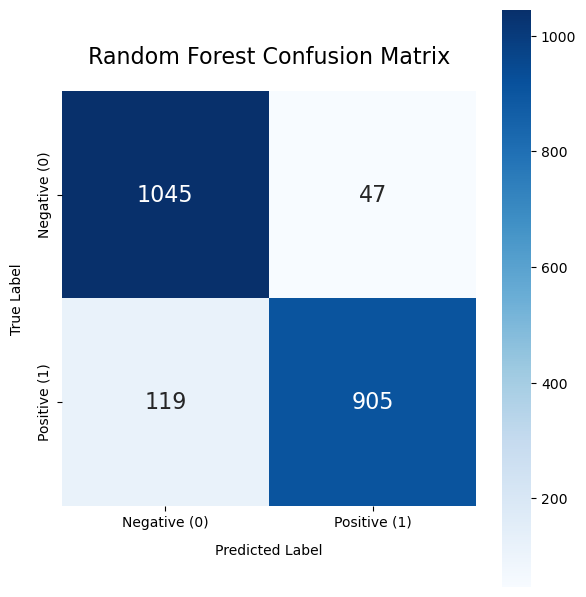


Results for logistic regression Near miss2:
Accuracy: 0.8861058601134215
Precision: 0.8857142857142857
Recall: 0.8779296875
F1-score: 0.8818048062775871


              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89      1092
         1.0       0.89      0.88      0.88      1024

    accuracy                           0.89      2116
   macro avg       0.89      0.89      0.89      2116
weighted avg       0.89      0.89      0.89      2116



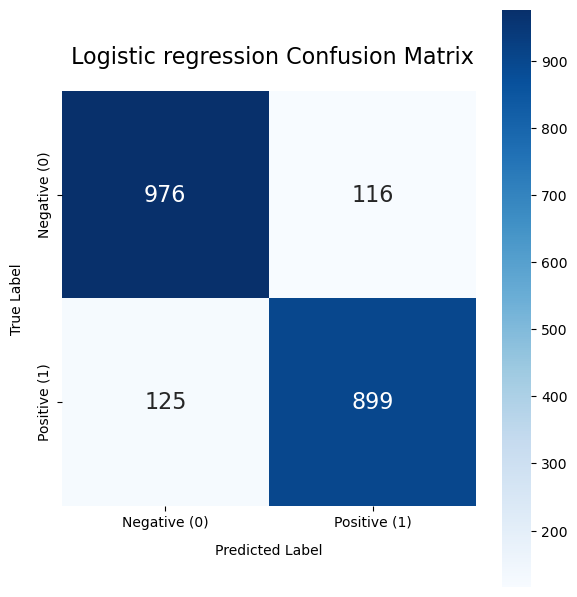

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Split the resampled data X_nm2, y_nm2
sample_x_train, sample_x_test, sample_y_train, sample_y_test = train_test_split(
    X_nm2, y_nm2, test_size=0.2, random_state=42
)

# Train Random Forest
rf = RandomForestClassifier(max_features=2,n_estimators=100, random_state=42)
rf.fit(sample_x_train, sample_y_train)

# Make Random Forest predictions
sample_y_pred = rf.predict(sample_x_test)

# Print results
print(f"\nResults for Random Forest NearMiss2:\n\n")
print("Accuracy:", accuracy_score(sample_y_test, sample_y_pred))
print("Precision:", precision_score(sample_y_test, sample_y_pred))
print("Recall:", recall_score(sample_y_test, sample_y_pred))
print("F1-score:", f1_score(sample_y_test, sample_y_pred))
print(f"\n")
print(classification_report(sample_y_test, sample_y_pred))

# To use the function with your data:
plot_confusion_matrix(sample_y_test, sample_y_pred, " Random Forest Confusion Matrix ")
plt.show()

#train logistic regression
reg_model = LogisticRegression(max_iter=300,solver='liblinear')
reg_model.fit(sample_x_train, sample_y_train)

# Make logistic regression predictions
reg_y_pred = reg_model.predict(sample_x_test)

# Print results
print(f"\nResults for logistic regression Near miss2:")
print("Accuracy:", accuracy_score(sample_y_test, reg_y_pred))
print("Precision:", precision_score(sample_y_test, reg_y_pred))
print("Recall:", recall_score(sample_y_test, reg_y_pred))
print("F1-score:", f1_score(sample_y_test, reg_y_pred))
print(f"\n")
print(classification_report(sample_y_test, reg_y_pred))

# To use the function with your data:
plot_confusion_matrix(sample_y_test, reg_y_pred, " Logistic regression Confusion Matrix")
plt.show()



# from lime.lime_tabular import LimeTabularExplainer
explainer_lime = LimeTabularExplainer(
    sample_x_train.values,
    training_labels=sample_y_train,
    feature_names=sample_x_train.columns,
    class_names=['No', 'Yes'],
    discretize_continuous=True
)
explanation = explainer_lime.explain_instance(sample_x_test.iloc[0].values, rf.predict_proba, num_features=10)
explanation.show_in_notebook()

In [41]:
"""from the above lime representation for the random forest shows that when one's account balance is 517 or more they're 
likely to make more deposits
and also if duration of the call is 13280 seconds or more the customer is more likely to make deposits

It also shows 
"""

"from the above lime representation for the random forest shows that when one's account balance is 517 or more they're \nlikely to make more deposits\nand also if duration of the call is 13280 seconds or more the customer is more likely to make deposits\n\nIt also shows \n"

In [42]:
#reg_model
reg_explainer_lime = LimeTabularExplainer(
    sample_x_train.values,
    training_labels=sample_y_train,
    feature_names=sample_x_train.columns,
    class_names=['No', 'Yes'],
    discretize_continuous=True
)
reg_explanation = reg_explainer_lime.explain_instance(sample_x_test.iloc[0].values, reg_model.predict_proba, num_features=10)
reg_explanation.show_in_notebook()

NameError: name 'LimeTabularExplainer' is not defined

In [ ]:
import shap
import matplotlib.pyplot as plt

In [ ]:
shap_explainer = shap.TreeExplainer(rf)
plt.figure(figsize=(10, 8))
shap_values = shap_explainer.shap_values(sample_x_train)
if isinstance(shap_values, list):  # For multi-class output
    shap_values = shap_values[1]
shap.summary_plot(shap_values, sample_x_train, max_display=20)
plt.tight_layout()

In [ ]:
for i in range(10):  # Analyze first 10 test samples
    explanation = explainer_lime.explain_instance(
        sample_x_test.iloc[i].values,
        rf.predict_proba,
        num_features=10
    )
    explanation.show_in_notebook()


In [ ]:
another_explainer = shap.Explainer(rf)
another_shap_values = another_explainer.shap_values(sample_x_train)
shap.summary_plot(another_shap_values, sample_x_train, feature_names=sample_x_train.columns, plot_type="waterfall")

In [ ]:
import shap

# Assuming 'rf' is your trained Random Forest model and 'rand_x_test' is your test data
exp = shap.TreeExplainer(rf)
x_shap_values = exp.shap_values(sample_x_test)

# Summary plot
shap.summary_plot(x_shap_values, sample_x_test, plot_type="bar")

# Dependence plot for a specific feature (e.g., 'age')
shap.dependence_plot("age", x_shap_values, sample_x_test)

# Force plot for a specific prediction
shap.force_plot(exp.expected_value, x_shap_values[0,:], sample_x_test.iloc[0,:])